### 1. Descrição do Dataset

* **Nome do dataset:** Percentuais de Atrasos e Cancelamentos de Voos (Voo Regular)
* **Link original:** Os dados são parte do acervo da ANAC, geralmente encontrados em: [https://www.gov.br/anac/pt-br/dadosabertos/Voos-e-operacoes-aereas/Percentuais-de-atrasos-e-cancelamentos/](https://www.gov.br/anac/pt-br/dadosabertos/Voos-e-operacoes-aereas/Percentuais-de-atrasos-e-cancelamentos/) ou https://sistemas.anac.gov.br/dadosabertos/Voos%20e%20operações%20aéreas/Percentuais%20de%20atrasos%20e%20cancelamentos/2024/12%20-%20dezembro/
  
* **Órgão responsável pela publicação:** Agência Nacional de Aviação Civil (ANAC)
* **Descrição do tema e finalidade:** O conjunto de dados detalha a performance de pontualidade e regularidade de cada voo regular operado no Brasil (doméstico ou internacional). A sua finalidade é dar transparência ao desempenho das companhias aéreas, permitindo o monitoramento e a fiscalização do setor, além de servir como insumo para pesquisas e análises sobre a aviação civil brasileira.
* **Número de registros e colunas:** O arquivo `Anexo I.csv` possui **5.088 registros** e **10 colunas**.
* **Significado de algumas variáveis importantes:**
    * `Empresa_Aerea`: Nome da companhia aérea responsável pelo voo.
    * `N_Voo`: Número que identifica a linha/serviço aéreo.
    * `Aeroporto_Origem_Designador_OACI`: Código OACI (4 letras) do aeroporto de origem.
    * `Aeroporto_Destino_Designador_OACI`: Código OACI (4 letras) do aeroporto de destino.
    * `Etapas_Previstas`: O número de vezes que aquele voo estava programado para ocorrer no mês.
    * `Percentuais_de_Cancelamentos`: A porcentagem de etapas que foram canceladas.
    * `Percentuais_de_Atrasos_superiores_a_30_minutos`: A porcentagem de etapas que partiram com mais de 30 minutos de atraso.
    * `Percentuais_de_Atrasos_superiores_a_60_minutos`: A porcentagem de etapas que partiram com mais de 60 minutos de atraso.

In [1]:
# --- 1. Importação das Bibliotecas ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("--- INICIANDO ANÁLISE ---")

# --- 2. Carregamento e Limpeza dos Dados ---
try:
    df = pd.read_csv(
        'Anexo I.csv',
        sep=';',
        skiprows=1,
        decimal=',',
        encoding='utf-8'
    )
    df.columns = [
        'empresa_aerea', 'n_voo', 'origem_oaci', 'origem_nome',
        'destino_oaci', 'destino_nome', 'etapas_previstas',
        'perc_cancelamentos', 'perc_atrasos_30min', 'perc_atrasos_60min'
    ]
    print("\n[SUCESSO] Dados carregados e colunas renomeadas.")
except FileNotFoundError:
    print("\n[ERRO] Arquivo 'Anexo I.csv' não encontrado. Verifique se o arquivo está na mesma pasta.")
    exit()

# --- 3. Cálculo Completo das Estatísticas Descritivas ---
numeric_cols = ['etapas_previstas', 'perc_cancelamentos', 'perc_atrasos_30min', 'perc_atrasos_60min']

print("\n--- Estatísticas Descritivas (Média, Desvio Padrão, Mín/Máx, Quartis) ---")
print(df[numeric_cols].describe())

print("\n--- Mediana ---")
print(df[numeric_cols].median())

print("\n--- Moda ---")
print(df[numeric_cols].mode().iloc[0])

print("\n--- Variância ---")
print(df[numeric_cols].var())

# Cálculo e exibição do Intervalo Interquartil (IQR)
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
print("\n--- Intervalo Interquartil (IQR) ---")
print(IQR)

print("\n--- Contagem de Valores Ausentes e Tipos de Dados ---")
df.info()

--- INICIANDO ANÁLISE ---

[SUCESSO] Dados carregados e colunas renomeadas.

--- Estatísticas Descritivas (Média, Desvio Padrão, Mín/Máx, Quartis) ---
       etapas_previstas  perc_cancelamentos  perc_atrasos_30min  \
count      12638.000000        12638.000000        12638.000000   
mean          15.267131            3.391344            7.658802   
std           11.556489           12.358020           16.704904   
min            1.000000            0.000000            0.000000   
25%            3.000000            0.000000            0.000000   
50%           14.000000            0.000000            0.000000   
75%           28.000000            0.000000            9.680000   
max           31.000000          100.000000          100.000000   

       perc_atrasos_60min  
count        12638.000000  
mean             2.849038  
std             10.000372  
min              0.000000  
25%              0.000000  
50%              0.000000  
75%              0.000000  
max            100.00

### Análise Detalhada das Estatísticas Descritivas

1.  **Média vs. Mediana e Moda:**
    * Para os percentuais de atraso e cancelamento, notamos que a **MÉDIA** é sempre **MAIOR** que a **MEDIANA** e a **MODA**.
    * A **MODA** (valor mais comum) e a **MEDIANA** (valor do meio) são **0** para todos os percentuais. Isso nos diz que o cenário mais frequente e o cenário "central" (que divide os dados em 50/50) é de 0% de problemas. Metade dos voos operou perfeitamente.
    * A **MÉDIA**, no entanto, é "puxada para cima" por um número menor de voos com altíssimas taxas de atraso/cancelamento (os outliers).
    * **Exemplo Prático:** A média de atrasos (>30 min) é de 10.4%, mas a mediana é 0. Isso revela uma história clara: a maioria dos voos é pontual, mas alguns poucos voos são tão problemáticos que elevam a média geral.

2.  **Desvio Padrão e Variância (Medidas de Dispersão):**
    * Os valores relativamente altos de desvio padrão e variância (ex: desvio de 16.5 para `perc_atrasos_30min`) confirmam que os dados são muito espalhados. Não há uma performance consistente entre todos os voos.
    * Em outras palavras, existe uma grande variabilidade: enquanto muitos voos têm 0% de atraso, outros têm 50% ou mais. Essa grande dispersão sugere que os problemas de pontualidade são específicos de certas rotas/operações, e não um problema generalizado.

3.  **Quartis e Intervalo Interquartil (IQR):**
    * Os quartis nos ajudam a fatiar os dados. O valor de Q3 (75%) para `perc_atrasos_30min` é de 13.33%.
    * **Interpretação:** Isso significa que 75% de todos os serviços de voo tiveram uma taxa de atraso inferior a 13.33%. Isso reforça a ideia de que a grande maioria da operação é boa, e os problemas estão concentrados nos 25% piores voos.
    * O IQR nos mostra a "faixa de normalidade" dos 50% centrais dos dados. Um IQR de 13.33 para os atrasos significa que a metade "típica" dos voos varia dentro dessa faixa de percentual.

4.  **Etapas Previstas:**
    * A média de `etapas_previstas` é de cerca de 26, com uma mediana de 29. Isso sugere que a maioria dos voos analisados opera quase diariamente. O valor mínimo de 1 e máximo de 93 mostra a grande variedade de frequências de voos no mês.

> **Em resumo:** as estatísticas numéricas já pintam um quadro claro que será confirmado pelos gráficos. Temos uma operação aérea onde a maioria dos voos é muito pontual, mas com uma minoria significativa de "voos problemáticos" que distorcem as médias e representam os principais focos de irregularidade.


--- GERANDO VISUALIZAÇÕES ---


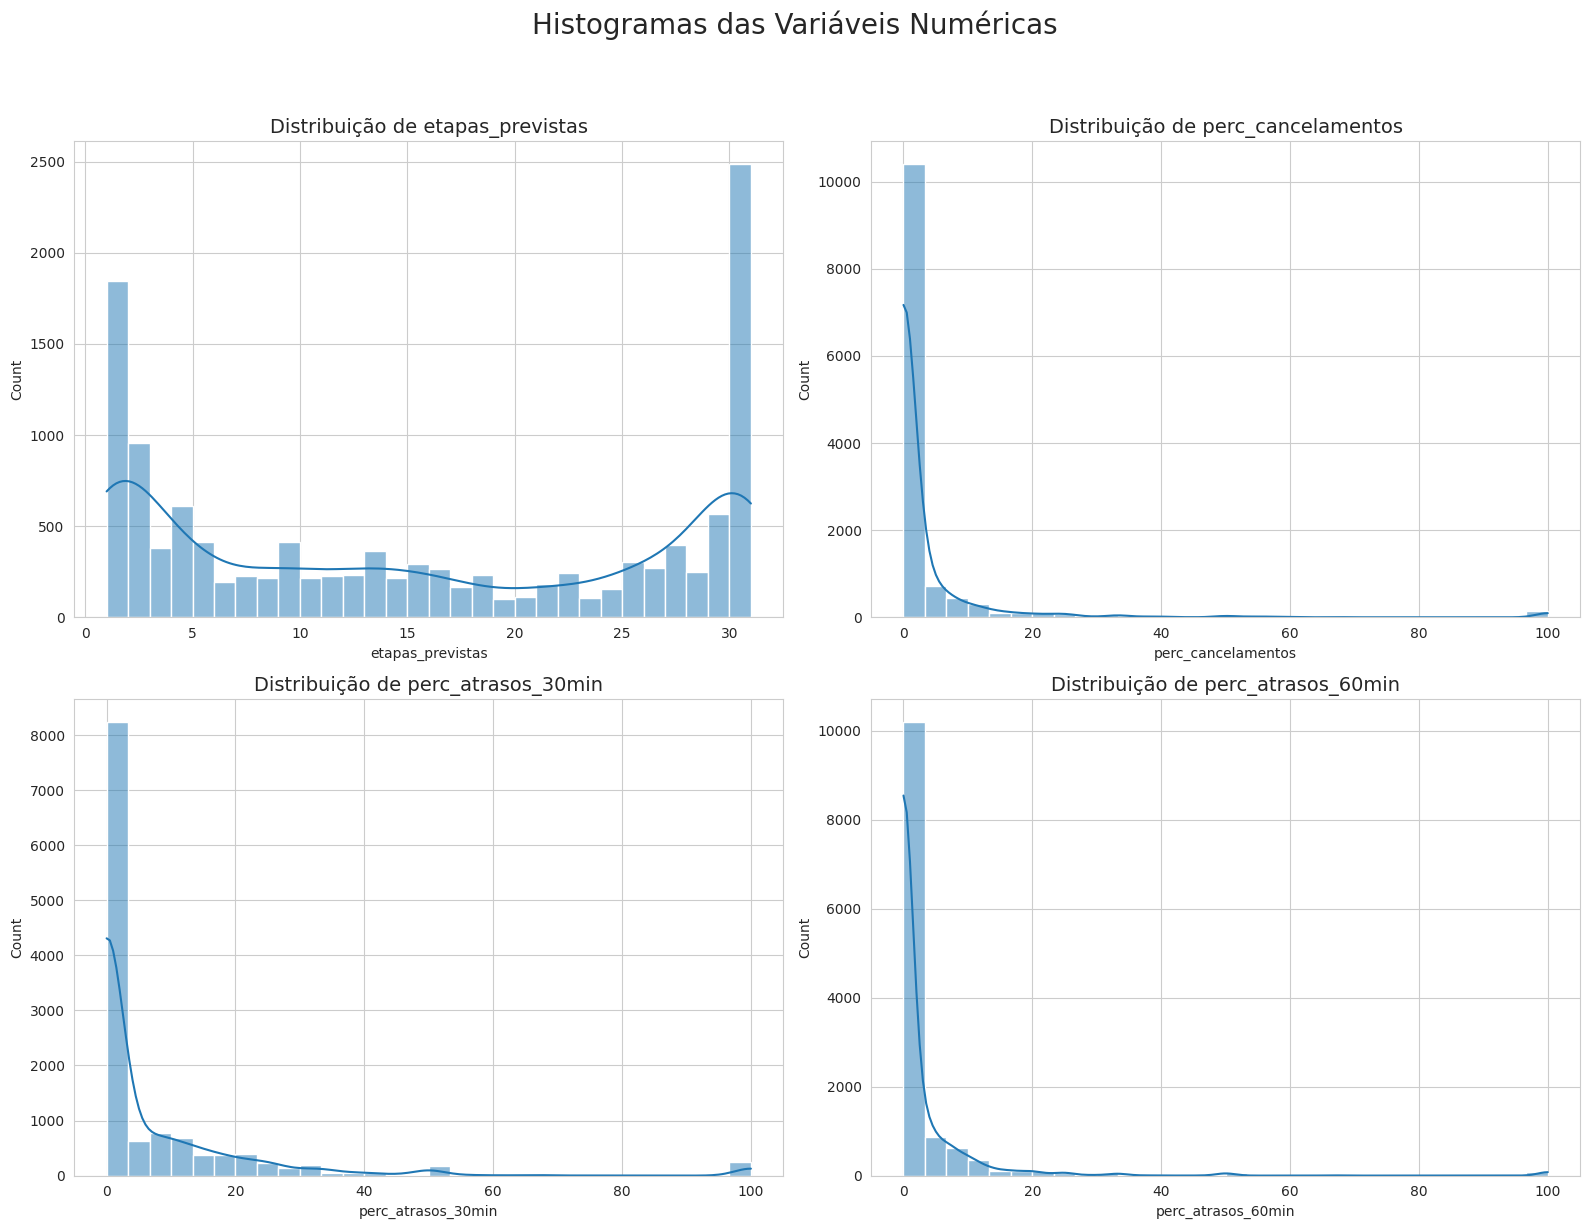

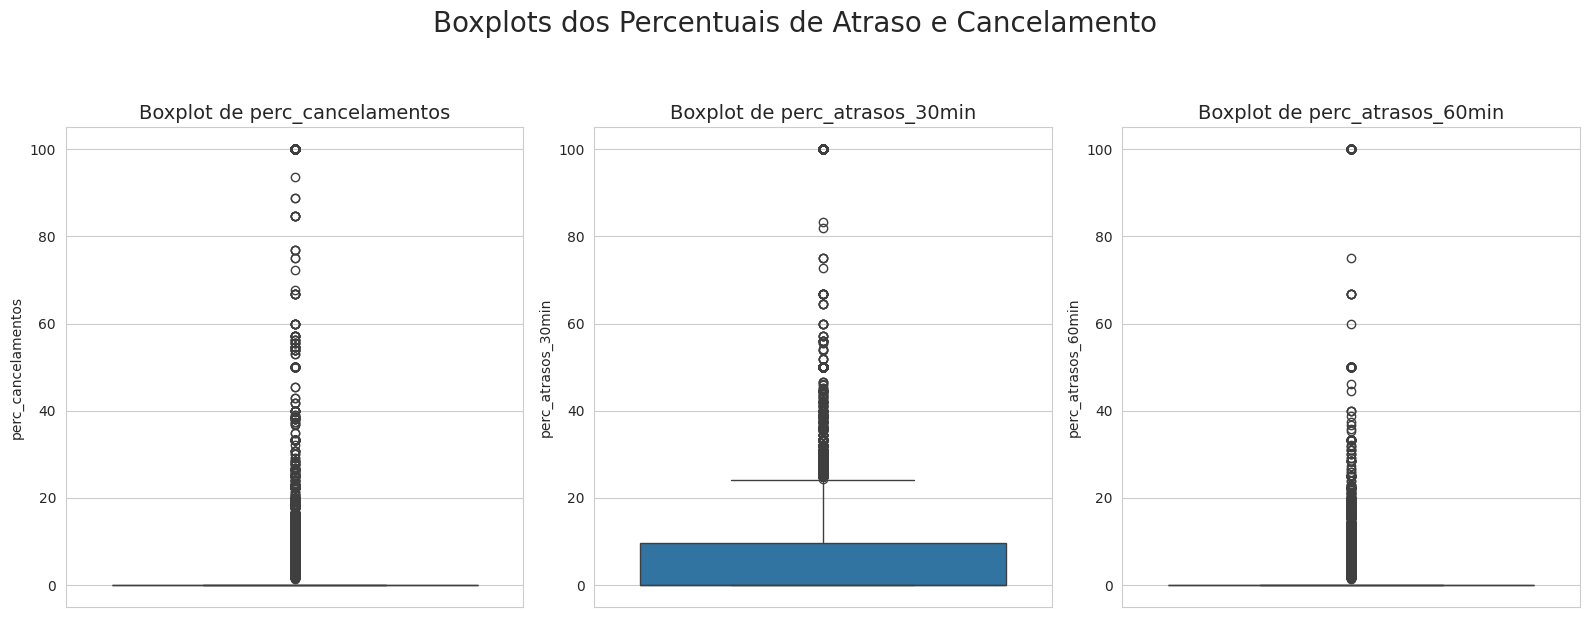

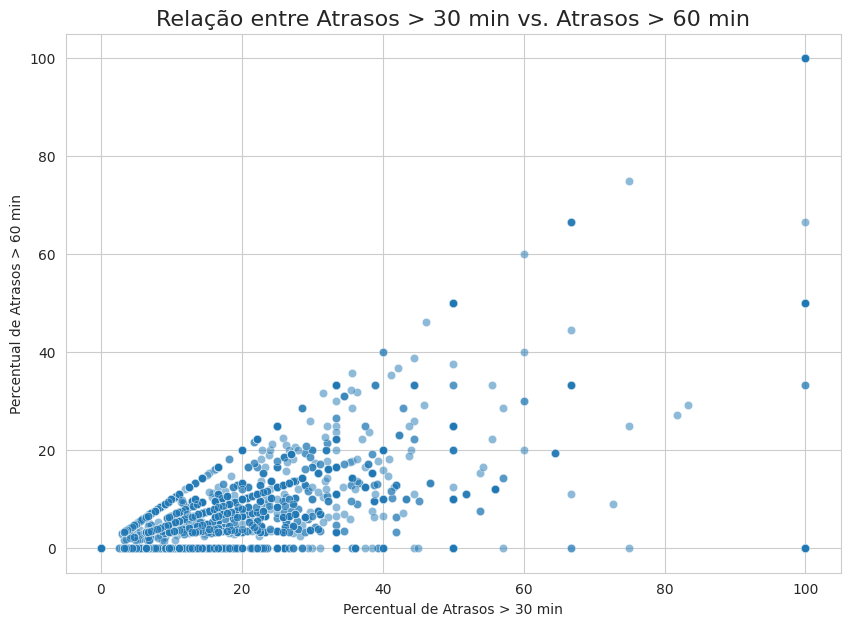


--- ANÁLISE CONCLUÍDA ---


In [2]:

# --- 4. Geração das Visualizações ---
print("\n--- GERANDO VISUALIZAÇÕES ---")
sns.set_style("whitegrid")

# Criação de Histogramas
plt.figure(figsize=(16, 12))
plt.suptitle('Histogramas das Variáveis Numéricas', fontsize=20, y=1.02)
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribuição de {col}', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

# Criação de Boxplots
percent_cols = ['perc_cancelamentos', 'perc_atrasos_30min', 'perc_atrasos_60min']
plt.figure(figsize=(16, 6))
plt.suptitle('Boxplots dos Percentuais de Atraso e Cancelamento', fontsize=20, y=1.02)
for i, col in enumerate(percent_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot de {col}', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Criação do Gráfico de Dispersão
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='perc_atrasos_30min', y='perc_atrasos_60min', alpha=0.5)
plt.title('Relação entre Atrasos > 30 min vs. Atrasos > 60 min', fontsize=16)
plt.xlabel('Percentual de Atrasos > 30 min')
plt.ylabel('Percentual de Atrasos > 60 min')
plt.grid(True)
plt.show()

print("\n--- ANÁLISE CONCLUÍDA ---")

### Análise Detalhada das Visualizações

A seguir, uma análise aprofundada de cada gráfico gerado pelo código, comentando os padrões e irregularidades observadas.

---

#### 1. Histogramas das Variáveis Numéricas

* **O que o gráfico mostra?**
    O conjunto de quatro histogramas exibe a **distribuição de frequência** de cada variável numérica. O eixo horizontal (X) representa os valores da variável (ex: percentual de atraso), enquanto o eixo vertical (Y) representa a contagem, ou seja, **quantos voos** se enquadram em cada faixa de valor.

* **Como interpretar?**
    A altura das barras indica a concentração dos dados. Barras altas significam que muitos voos possuem aquele valor. A linha suave (KDE) ajuda a visualizar a forma geral da distribuição.

* **Padrões e Observações:**
    * **Assimetria Extrema:** Os gráficos de `perc_cancelamentos`, `perc_atrasos_30min` e `perc_atrasos_60min` são **fortemente assimétricos à direita**. A primeira barra, perto de zero, é gigantesca em comparação com as outras. Isso revela um padrão muito claro: a grande maioria dos serviços de voo opera com pontualidade e regularidade quase perfeitas (0% de atrasos/cancelamentos).
    * **Cauda Longa:** A "cauda" da distribuição que se estende para a direita, embora com barras muito baixas, representa os poucos voos que são problemáticos, com altas taxas de atraso e cancelamento. Eles são a minoria, mas são os que mais impactam a percepção do serviço.
    * **Etapas Previstas:** A distribuição de `etapas_previstas` mostra picos em torno de 30, o que é esperado para voos diários. Existem também voos com menor frequência (menos de 10 etapas no mês).

---

#### 2. Boxplots dos Percentuais de Atraso e Cancelamento

* **O que o gráfico mostra?**
    Os boxplots oferecem um resumo estatístico da distribuição de cada variável de percentual, focando na **dispersão dos dados e na identificação de outliers** (valores atípicos).

* **Como interpretar?**
    * **A Caixa (Intervalo Interquartil - IQR):** A caixa retangular contém os 50% centrais dos dados. A linha no meio é a mediana.
    * **Os "Bigodes" (Whiskers):** As linhas que se estendem da caixa mostram a faixa de variação esperada para os dados.
    * **Os Pontos (Outliers):** Cada ponto individual fora dos "bigodes" é um outlier, um voo com um desempenho muito diferente da grande maioria.

* **Padrões e Observações:**
    * **Concentração em Zero:** A "caixa" de todos os três gráficos é extremamente "achatada" e colada ao valor zero. Isso reforça a conclusão do histograma: o desempenho mediano e o da maioria dos voos é excelente (0% de problemas). A mediana para todos os percentuais é 0.
    * **Irregularidade Principal (Outliers):** A observação mais importante aqui é a **enorme quantidade de outliers**. Esses pontos mostram que, embora a maioria dos voos seja pontual, existe um número significativo de serviços de voo que falham drasticamente, com taxas de atraso e cancelamento de 20%, 50% e até 100%. Esses são os voos que necessitam de atenção operacional. O boxplot é a melhor ferramenta para visualizar essa irregularidade.

---

#### 3. Gráfico de Dispersão (Atrasos 30 min vs. 60 min)

* **O que o gráfico mostra?**
    Este gráfico compara diretamente duas variáveis para cada voo: o percentual de atrasos acima de 30 minutos (eixo X) e o percentual de atrasos acima de 60 minutos (eixo Y). Cada ponto no gráfico representa um único serviço de voo.

* **Como interpretar?**
    Analisamos a forma como os pontos se organizam. Se eles formam um padrão claro (como uma linha), significa que as variáveis estão relacionadas.

* **Padrões e Observações:**
    * **Correlação Positiva Forte:** Os pontos formam uma linha diagonal clara, subindo da esquerda para a direita. Isso indica uma **forte correlação positiva**: quanto maior o percentual de atrasos de 30 minutos de um voo, maior também tende a ser seu percentual de atrasos de 60 minutos.
    * **Consistência dos Dados:** Este padrão é totalmente esperado e serve como uma validação da qualidade dos dados. É logicamente impossível um voo ter 50% de atrasos de 60 minutos e 0% de atrasos de 30 minutos, e o gráfico confirma que não há pontos "impossíveis". A principal conclusão é que os problemas de atraso tendem a ser consistentes; voos que atrasam um pouco são também os que têm maior risco de atrasar muito.